# Polynomial Regression

In [109]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# random.rand generate random numbers between 0 to 1
m = 300
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X*X + X + 2 + np.random.randn(m, 1)

<Axes: xlabel='X', ylabel='y'>

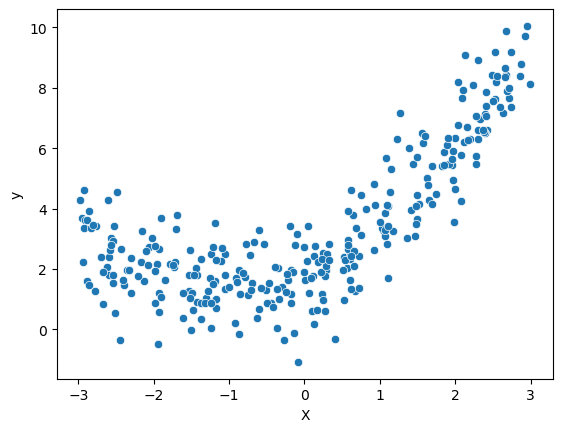

In [111]:
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
sns.scatterplot(x='X', y='y', data=df)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('y', axis=1), df['y'], test_size=0.30, random_state=101)

In [114]:
# combine the X, y back to a single dataframe for convenience purpose
df_train = X_train.copy()
df_train['y'] = y_train
df_train

,X,y
34,-1.986087,1.923250
1,-2.165475,2.220387
133,2.664522,8.658265
283,2.094063,7.647168
279,0.538505,2.310441
...,...,...
40,-0.701403,1.531213
75,1.887357,6.092185
87,-1.940839,-0.493838
63,1.469612,3.100507


***Now, let's focus on building the model using the training dataset (ie in-sample dataset)***

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [116]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_lin_pred = lin_model.predict(X_train)
df_train['y_lin_pred'] = y_lin_pred
print(lin_model.intercept_)
print(lin_model.coef_)

3.403602900230097
[1.01239269]


<Axes: xlabel='X', ylabel='y'>

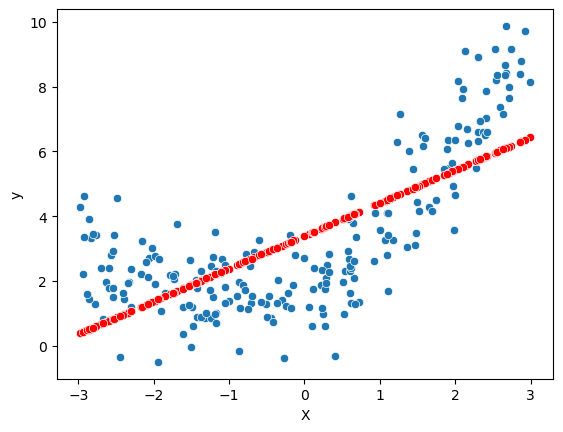

In [117]:
# checking in-sample performance
sns.scatterplot(x='X', y='y', data=df_train)
sns.scatterplot(x='X', y='y_lin_pred', color='red', data=df_train)

## Clearly a straight line will never fit the graph properly

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [120]:
poly_features

PolynomialFeatures(include_bias=False)

In [121]:
X_poly_train = poly_features.fit_transform(X_train)
X_poly_train[0]

array([-1.98608719,  3.94454232])

In [122]:
math.pow(2.7943, 2)

7.808112489999999

***X_poly now contains X as well as X^2***

***Now we can fit a model of y vs X and X^2***

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = LinearRegression()
model.fit(X_poly_train, y_train)
print(model.intercept_)
print(model.coef_)

1.9203496220122387
[1.0422671 0.4959345]


# That is we predict  y = 0.527 * X^2 + 1.096* X + 1.922

# while the actual is y = 0.5 * X^2 + 1.0 * X + 2.0 + Gaussian noise

In [124]:
X_poly_train = poly_features.fit_transform(X_train)
y_pred = model.predict(X_poly_train)
df_train['y_pred'] = y_pred
df_train.head()

,X,y,y_lin_pred,y_pred
34,-1.986087,1.923250,1.392903,1.806551
1,-2.165475,2.220387,1.211292,1.988922
133,2.664522,8.658265,6.101145,8.218467
283,2.094063,7.647168,5.523617,6.277646
279,0.538505,2.310441,3.948781,2.625430


<Axes: xlabel='X', ylabel='y_pred'>

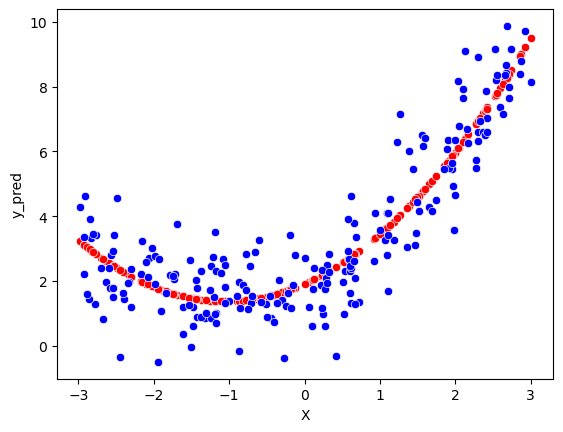

In [125]:
sns.scatterplot(x='X', y='y_pred', data=df_train, color='red')
sns.scatterplot(x='X', y='y', data=df_train, color='blue')

## You can fit a higher degree polynomial

In [126]:
poly20 = PolynomialFeatures(degree=20, include_bias=True)
X_poly20_train = poly20.fit_transform(X_train)
model20 = LinearRegression()
model20.fit(X_poly20_train, y_train)

y_pred20 = model20.predict(X_poly20_train)
df_train['y_pred20'] = y_pred20
df_train.head()

,X,y,y_lin_pred,y_pred,y_pred20
34,-1.986087,1.923250,1.392903,1.806551,2.260963
1,-2.165475,2.220387,1.211292,1.988922,2.301046
133,2.664522,8.658265,6.101145,8.218467,8.405006
283,2.094063,7.647168,5.523617,6.277646,6.564561
279,0.538505,2.310441,3.948781,2.625430,2.195768


In [127]:
print('Root Mean Squared Error with 1-degree polynomial:',
      np.sqrt(metrics.mean_squared_error(y_train, y_lin_pred)))
print('Root Mean Squared Error with 2-degree polynomial:',
      np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Root Mean Squared Error with 20-degree polynomial ',
      np.sqrt(metrics.mean_squared_error(y_train, y_pred20)))

Root Mean Squared Error with 1-degree polynomial: 1.669996831357341
Root Mean Squared Error with 2-degree polynomial: 1.0175737428791405
Root Mean Squared Error with 20-degree polynomial  0.9707022520493462


<Axes: xlabel='X', ylabel='y'>

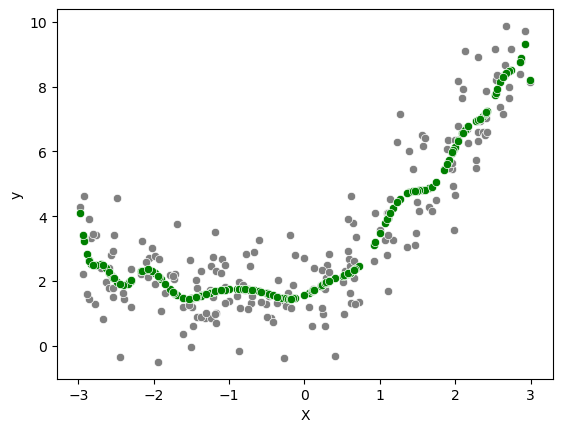

In [128]:
sns.scatterplot(x='X', y='y', data=df_train, color='gray')
sns.scatterplot(x='X', y='y_pred20', data=df_train, color='green')

<Axes: xlabel='X', ylabel='y'>

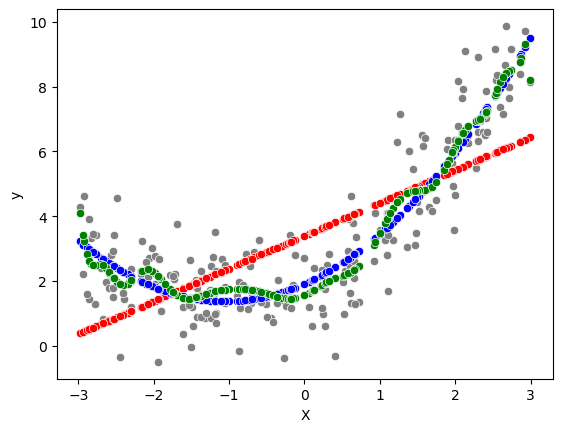

In [129]:
sns.scatterplot(x='X', y='y', data=df_train, color='gray')
sns.scatterplot(x='X', y='y_lin_pred', data=df_train, color='red')
sns.scatterplot(x='X', y='y_pred', data=df_train, color='blue')
sns.scatterplot(x='X', y='y_pred20', data=df_train, color='green')

### Green line has LOWEST root mean square error than the Red or Blue Line for in-sample data

### HOWEVER, Green line may be OVERFITTING while RED line UNDERFIT

### We can check the 3 models performance on the out-of-sample dataset to see which model perform the best

In [130]:
# combine X_test and y_test into a single dataframe for convenience purpose
df_test = X_test.copy()
df_test['y'] = y_test

# Apply linear model to testing dataset
y_lin_pred = lin_model.predict(X_test)
df_test['y_lin_pred'] = y_lin_pred

# Apply degree-2 model
X_poly_test = poly_features.fit_transform(X_test)
y_pred = model.predict(X_poly_test)
df_test['y_pred'] = y_pred

# Apply degree-20 model
X_poly20_test = poly20.fit_transform(X_test)
y_pred20 = model20.predict(X_poly20_test)
df_test['y_pred20'] = y_pred20

print('Root Mean Squared Error with 1-degree polynomial:',
      np.sqrt(metrics.mean_squared_error(y_test, y_lin_pred)))
print('Root Mean Squared Error with 2-degree polynomial:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error with 20-degree polynomial ',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred20)))

Root Mean Squared Error with 1-degree polynomial: 1.664069498932714
Root Mean Squared Error with 2-degree polynomial: 0.9310773528872758
Root Mean Squared Error with 20-degree polynomial  0.9701519767478453


### The Green model indeed under-perform than the Blue model for out-of-sample data !!!

<Axes: xlabel='X', ylabel='y'>

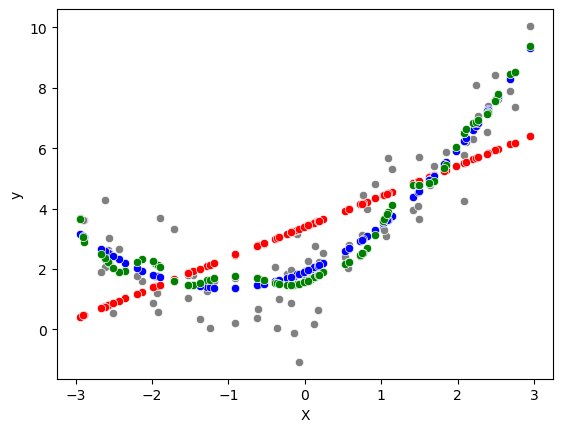

In [131]:
sns.scatterplot(x='X', y='y', data=df_test, color='gray')
sns.scatterplot(x='X', y='y_lin_pred', data=df_test, color='red')
sns.scatterplot(x='X', y='y_pred', data=df_test, color='blue')
sns.scatterplot(x='X', y='y_pred20', data=df_test, color='green')